<a href="https://colab.research.google.com/github/saitejakomaragiri/saitejakomaragiri/blob/main/project2_digital_marketing_trustpilot_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving simplilearn_trustpilot.csv to simplilearn_trustpilot.csv


In [3]:
data = pd.read_csv('simplilearn_trustpilot.csv')
data.head()

,review,consumer-information href,consumer-avatar,consumer-information__name,consumer-information__review-count,star-rating src,review-content-header__dates,review-date--tooltip-target,link,link href,review-content__text,review-content__text 2,review-content__text 3,button href
0,"{""socialShareUrl"":""https://www.trustpilot.com/...",https://www.trustpilot.com/users/60d464bbd8a57...,VI,Vinayak,1 review,https://cdn.trustpilot.net/brand-assets/4.1.0/...,"{""publishedDate"":""2021-06-24T10:57:12+00:00"",""...",3 days ago,Attended PMP course,https://www.trustpilot.com/reviews/60d46508f9f...,Attended PMP course. Though it was too fast it...,Project,management,https://businessapp.b2b.trustpilot.com/reviews...
1,"{""socialShareUrl"":""https://www.trustpilot.com/...",https://www.trustpilot.com/users/60d3fff2a4e06...,DS,Deepak S,1 review,https://cdn.trustpilot.net/brand-assets/4.1.0/...,"{""publishedDate"":""2021-06-24T03:48:24+00:00"",""...",3 days ago,Learnt lot of Good knowledge about…,https://www.trustpilot.com/reviews/60d40088f9f...,Learnt lot of Good knowledge about from Mr. ...,Project,Management,https://businessapp.b2b.trustpilot.com/reviews...
2,"{""socialShareUrl"":""https://www.trustpilot.com/...",https://www.trustpilot.com/users/583d4ce60000f...,KB,koustav biswas,3 reviews,https://cdn.trustpilot.net/brand-assets/4.1.0/...,"{""publishedDate"":""2021-06-24T03:47:58+00:00"",""...",3 days ago,PMP course: rating of 2 due to quality of trainer,https://www.trustpilot.com/reviews/60d4006ef9f...,"I attended PMP course 9-24 Jun'21, trainer nam...",project,management,https://businessapp.b2b.trustpilot.com/reviews...
3,"{""socialShareUrl"":""https://www.trustpilot.com/...",https://www.trustpilot.com/users/60d40018bdb1e...,ND,nischal djrr,1 review,https://cdn.trustpilot.net/brand-assets/4.1.0/...,"{""publishedDate"":""2021-06-24T03:46:50+00:00"",""...",Updated 3 days ago,Great Experience,https://www.trustpilot.com/reviews/60d4002af9f...,"Great Experience . Learnt Many things, how w...",Project,Management,https://businessapp.b2b.trustpilot.com/reviews...
4,"{""socialShareUrl"":""https://www.trustpilot.com/...",https://www.trustpilot.com/users/60ab8c3dbeaf9...,JA,Jay,2 reviews,https://cdn.trustpilot.net/brand-assets/4.1.0/...,"{""publishedDate"":""2021-06-12T17:36:26+00:00"",""...","Jun 12, 2021",Fantastic class by Mr Sreidhar,https://www.trustpilot.com/reviews/60c4f09af9f...,The PG-PMP Course with Instructor Mr. Sreidhar...,Project,management,https://businessapp.b2b.trustpilot.com/reviews...


In [4]:
data.shape


(147, 14)

In [5]:
data.isnull().sum()

# no missing values in the data 

review                                 0
consumer-information href              0
consumer-avatar                       43
consumer-information__name             0
consumer-information__review-count     0
star-rating src                        0
review-content-header__dates           0
review-date--tooltip-target            0
link                                   2
link href                              0
review-content__text                   0
review-content__text 2                 4
review-content__text 3                 4
button href                            0
dtype: int64

In [6]:
#we were only interested in the comments and rating hence we only consider comments.

# collecting only tweets from the given dataset

new_data = pd.DataFrame()
new_data['comment'] = data['review-content__text'].copy()

new_data.head()

,comment
0,Attended PMP course. Though it was too fast it...
1,Learnt lot of Good knowledge about from Mr. ...
2,"I attended PMP course 9-24 Jun'21, trainer nam..."
3,"Great Experience . Learnt Many things, how w..."
4,The PG-PMP Course with Instructor Mr. Sreidhar...


In [8]:
# function for cleaning the data
import string

def cleantext(text):
  text = text.lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\W*\d\w*', '', text)
  text = re.sub('[''""...]', '', text)
  text = re.sub('\n', '', text)

  return text

new_data['comment'] = new_data['comment'].apply(cleantext)

#show cleaned data 
new_data.head() 



,comment
0,attended pmp course though it was too fast it ...
1,learnt lot of good knowledge about from mr v...
2,i attended pmp course jun trainer name vishal ...
3,great experience learnt many things how wor...
4,the pgpmp course with instructor mr sreidhar w...


In [9]:
# creating  a function for subjectivity
def createsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# creating a function for polarity
def createpolarity(text):
  return TextBlob(text).sentiment.polarity

# creating subjectivity and polarity columns

new_data['subjectivity'] = new_data['comment'].apply(createsubjectivity)   
new_data['polarity'] = new_data['comment'].apply(createpolarity) 

new_data.head(10)

,comment,subjectivity,polarity
0,attended pmp course though it was too fast it ...,0.550000,0.116667
1,learnt lot of good knowledge about from mr v...,0.408333,0.233333
2,i attended pmp course jun trainer name vishal ...,0.572222,0.311111
3,great experience learnt many things how wor...,0.670000,0.720000
4,the pgpmp course with instructor mr sreidhar w...,0.900000,0.400000
5,i attended instructor lead simplylearn pmp tra...,0.708333,0.333333
6,i came across the simplilearn and umass amhers...,0.751852,0.422222
7,the certificate course by simplilearn taught...,0.383333,0.333333
8,trainer has great knowledge about she has br...,0.471501,0.245455
9,excellent coaching on pmp by ritu gupta trai...,0.576667,0.420000


In [10]:
# creating a function to check +ve , -ve & neutral comments

def createanalysis(score):
  if (score < 0):
    return 'Negative'
  elif (score == 0):
      return 'Neutral'
  else:
      return 'Positive'

new_data['analysis'] = new_data['polarity'].apply(createanalysis)

# showing the dataset
new_data.head(10)

,comment,subjectivity,polarity,analysis
0,attended pmp course though it was too fast it ...,0.550000,0.116667,Positive
1,learnt lot of good knowledge about from mr v...,0.408333,0.233333,Positive
2,i attended pmp course jun trainer name vishal ...,0.572222,0.311111,Positive
3,great experience learnt many things how wor...,0.670000,0.720000,Positive
4,the pgpmp course with instructor mr sreidhar w...,0.900000,0.400000,Positive
5,i attended instructor lead simplylearn pmp tra...,0.708333,0.333333,Positive
6,i came across the simplilearn and umass amhers...,0.751852,0.422222,Positive
7,the certificate course by simplilearn taught...,0.383333,0.333333,Positive
8,trainer has great knowledge about she has br...,0.471501,0.245455,Positive
9,excellent coaching on pmp by ritu gupta trai...,0.576667,0.420000,Positive


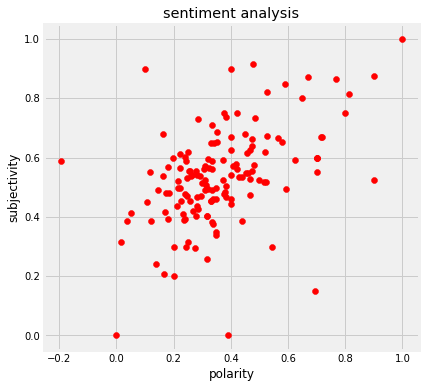

In [11]:
# plotting a scatter plot 

plt.figure(figsize=(6,6))
for i in range(0, data.shape[0]):
  plt.scatter(new_data['polarity'][i], new_data['subjectivity'][i], color = 'Red')

plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.title('sentiment analysis')
plt.show()


In [12]:
#number of positive , negative & neutral comments comments
poscomments = 0
neutralcomments = 0
negcomments = 0

for i in range (0, data.shape[0]):
  if (new_data['analysis'][i] == 'Positive'):
    poscomments = poscomments+1
  elif (new_data['analysis'][i] == 'Neutral'):
    neutralcomments = neutralcomments+1
  else :
      negcomments = negcomments+1

print('number of positive tweets :',poscomments)
print('number of neutral tweets :',neutralcomments)
print('number of negative tweets :',negcomments)   

number of positive tweets : 145
number of neutral tweets : 1
number of negative tweets : 1


In [13]:
#number of positive , negative & neutral comments comments

print('percentage of positive comments :', round((poscomments/new_data.shape[0])*100, 1),'%')

print('percentage of neutral comments :', round((neutralcomments/new_data.shape[0])*100, 1),'%')

print('percentage of negative comments :', round((negcomments/new_data.shape[0])*100, 1),'%')

percentage of positive comments : 98.6 %
percentage of neutral comments : 0.7 %
percentage of negative comments : 0.7 %
